In [2]:
from gal_goku import halo_tools, summary_stats
import importlib
importlib.reload(halo_tools)
mass_range = (11.1, 13.5)
z=2.5
data_dir = f'/home/qezlou/HD2/HETDEX/cosmo/data/'
hmf_hf = summary_stats.HMF(data_dir, fid='HF', z=z, narrow=True, mass_range=mass_range)
mbins, log_hmfs_hf, _, cosmo_params, sim_tags_hf = hmf_hf.get_wt_err()


2025-10-22 10:55:07.115196: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-10-22 10:55:07.118398: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-10-22 10:55:07.127874: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1761148507.143295  617898 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1761148507.147966  617898 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1761148507.160418  617898 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

summary_stats | 10/22/2025 10:55:09 AM | Rank 0 | INFO  |  loading from HF_hmfs_2.5_narrow_no_merge.hdf5


In [4]:
import numpy as np
# Tinker params at z
A0, a0, b0, c0, Delta = 0.186, 1.47, 2.57, 1.19, 200
alpha = -(0.75/np.log10(Delta/75.0))**1.2
A = A0 * (1 + z) ** -0.14
a = a0 * (1 + z) ** -0.06
b = b0 * (1 + z) ** - alpha
c = c0

print(f"Tinker params at z={z}: A={A}, a={a}, b={b}, c={c}")

Tinker params at z=2.5: A=0.15607862054124375, a=1.363556858286577, b=30.382341332130075, c=1.19


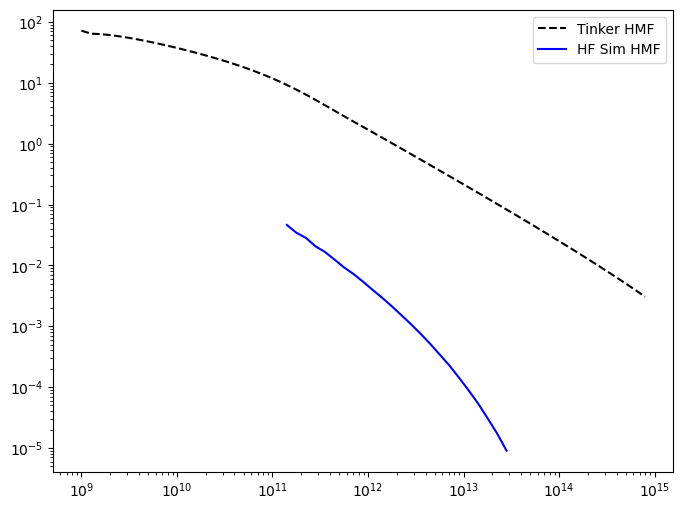

In [7]:
from matplotlib import pyplot as plt
importlib.reload(halo_tools)
import numpy as np
i = 2
htool = halo_tools.HaloTools(cosmo_params[i], z=2.5, cosmo_method='classylss')
larger_mbins = np.arange(9, 15, 0.1)
tinker_hmf_class = htool.tinker_hmf(mbins=10**larger_mbins, A=A/2, a=a, b=b, c=c, delta=Delta)
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(10**larger_mbins, tinker_hmf_class, label='Tinker HMF', color='black', ls='--')
ax.plot(10**mbins, 10**log_hmfs_hf[i], label='HF Sim HMF', color='blue', ls='-')
ax.set_yscale('log')
ax.set_xscale('log')
ax.legend()